# Personal Loan Analysis
March, 2025  |  Carlos Herrera Valerio

![title](./iStock-1145371340-980x653.jpg)

This project analyzes a fairly large loan information dataset, the process will be divided in 4 stages: exploration, data handling, model training and evaluation. Throughout each step a brief explanation will be given with the thought process that leads every decision. The approach of this project focus in sorting the data and visually representating the information at every point with the objective of walking the reader in understanding the process and get their own insights hidden within the data and hopefully help the user to build an intuation filtering the most important features to determine the implicit risk in new clients's loans.

The Lending Club Loan Dataset contain complete loan data for all loans issued through the 2007-2018, including the current loan status (Current, Charged-off, Fully Paid, etc.) and latest payment information. The csv containing loan data through the "present" contains complete loan data for all loans issued through the previous completed calendar quarter. Additional features include credit scores, number of finance inquiries, and collections among others. The file is a matrix of about 2.2 million observations and 151 variables.

As an additional opportunity we will be exploting in this project is the use of Nvidia's GPU accelerator library Cuda which will help us reducing time required to train the model and handling the data.

Dataset source: https://www.kaggle.com/datasets/wordsforthewise/lending-club?select=accepted_2007_to_2018Q4.csv.gz

## Stage 1: Exploring the Dataset


### Dataset Description

First lets check following table with the description of every feature of the dataset, it will be use for reference later during the analysis.


|Index|Feature|Description|
|:----|:------|:----------|
|	1	|	acceptD	|	The date which the borrower accepted  the offer	|
|	2	|	accNowDelinq	|	The number of accounts on which the borrower is now delinquent.	|
|	3	|	accOpenPast24Mths	|	Number of trades opened in past 24 months.	|
|	4	|	addrState	|	The state provided by the borrower in the loan application	|
|	5	|	all_util	|	Balance to credit limit on all trades	|
|	6	|	annual_inc_joint	|	The combined self-reported annual income provided by the co-borrowers during registration	|
|	7	|	annualInc	|	The self-reported annual income provided by the borrower during registration.	|
|	8	|	application_type	|	Indicates whether the loan is an individual application or a joint application with two co-borrowers	|
|	9	|	avg_cur_bal	|	Average current balance of all accounts	|
|	10	|	bcOpenToBuy	|	Total open to buy on revolving bankcards.	|
|	11	|	bcUtil	|	Ratio of total current balance to high credit/credit limit for all bankcard accounts.	|
|	12	|	chargeoff_within_12_mths	|	Number of charge-offs within 12 months	|
|	13	|	collections_12_mths_ex_med	|	Number of collections in 12 months excluding medical collections	|
|	14	|	creditPullD	|	The date LC pulled credit for this loan	|
|	15	|	delinq2Yrs	|	The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years	|
|	16	|	delinqAmnt	|	The past-due amount owed for the accounts on which the borrower is now delinquent.	|
|	17	|	desc	|	Loan description provided by the borrower	|
|	18	|	dti	|	A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.	|
|	19	|	dti_joint	|	A ratio calculated using the co-borrowers' total monthly payments on the total debt obligations, excluding mortgages and the requested LC loan, divided by the co-borrowers' combined self-reported monthly income	|
|	20	|	earliestCrLine	|	The date the borrower's earliest reported credit line was opened	|
|	21	|	effective_int_rate	|	The effective interest rate is equal to the interest rate on a Note reduced by Lending Club's estimate of the impact of uncollected interest prior to charge off. 	|
|	22	|	emp_title	|	The job title supplied by the Borrower when applying for the loan.*	|
|	23	|	empLength	|	Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.	|
|	24	|	expD	|	The date the listing will expire	|
|	25	|	expDefaultRate	|	The expected default rate of the loan.	|
|	26	|	ficoRangeHigh	|	The upper boundary range the borrower’s FICO at loan origination belongs to.	|
|	27	|	ficoRangeLow	|	The lower boundary range the borrower’s FICO at loan origination belongs to.	|
|	28	|	fundedAmnt	|	The total amount committed to that loan at that point in time.	|
|	29	|	grade	|	LC assigned loan grade	|
|	30	|	homeOwnership	|	The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.	|
|	31	|	id	|	A unique LC assigned ID for the loan listing.	|
|	32	|	il_util	|	Ratio of total current balance to high credit/credit limit on all install acct	|
|	33	|	ils_exp_d	|	wholeloan platform expiration date	|
|	34	|	initialListStatus	|	The initial listing status of the loan. Possible values are – W, F	|
|	35	|	inq_fi	|	Number of personal finance inquiries	|
|	36	|	inq_last_12m	|	Number of credit inquiries in past 12 months	|
|	37	|	inqLast6Mths	|	The number of inquiries in past 6 months (excluding auto and mortgage inquiries)	|
|	38	|	installment	|	The monthly payment owed by the borrower if the loan originates.	|
|	39	|	intRate	|	Interest Rate on the loan	|
|	40	|	isIncV	|	Indicates if income was verified by LC, not verified, or if the income source was verified	|
|	41	|	listD	|	The date which the borrower's application was listed on the platform.	|
|	42	|	loanAmnt	|	The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.	|
|	43	|	max_bal_bc	|	Maximum current balance owed on all revolving accounts	|
|	44	|	memberId	|	A unique LC assigned Id for the borrower member.	|
|	45	|	mo_sin_old_rev_tl_op	|	Months since oldest revolving account opened	|
|	46	|	mo_sin_rcnt_rev_tl_op	|	Months since most recent revolving account opened	|
|	47	|	mo_sin_rcnt_tl	|	Months since most recent account opened	|
|	48	|	mortAcc	|	Number of mortgage accounts.	|
|	49	|	msa	|	Metropolitan Statistical Area of the borrower.	|
|	50	|	mths_since_last_major_derog	|	Months since most recent 90-day or worse rating	|
|	51	|	mths_since_oldest_il_open	|	Months since oldest bank installment account opened	|
|	52	|	mths_since_rcnt_il	|	Months since most recent installment accounts opened	|
|	53	|	mthsSinceLastDelinq	|	The number of months since the borrower's last delinquency.	|
|	54	|	mthsSinceLastRecord	|	The number of months since the last public record.	|
|	55	|	mthsSinceMostRecentInq	|	Months since most recent inquiry.	|
|	56	|	mthsSinceRecentBc	|	Months since most recent bankcard account opened.	|
|	57	|	mthsSinceRecentLoanDelinq	|	Months since most recent personal finance delinquency.	|
|	58	|	mthsSinceRecentRevolDelinq	|	Months since most recent revolving delinquency.	|
|	59	|	num_accts_ever_120_pd	|	Number of accounts ever 120 or more days past due	|
|	60	|	num_actv_bc_tl	|	Number of currently active bankcard accounts	|
|	61	|	num_actv_rev_tl	|	Number of currently active revolving trades	|
|	62	|	num_bc_sats	|	Number of satisfactory bankcard accounts	|
|	63	|	num_bc_tl	|	Number of bankcard accounts	|
|	64	|	num_il_tl	|	Number of installment accounts	|
|	65	|	num_op_rev_tl	|	Number of open revolving accounts	|
|	66	|	num_rev_accts	|	Number of revolving accounts	|
|	67	|	num_rev_tl_bal_gt_0	|	Number of revolving trades with balance >0	|
|	68	|	num_sats	|	Number of satisfactory accounts	|
|	69	|	num_tl_120dpd_2m	|	Number of accounts currently 120 days past due (updated in past 2 months)	|
|	70	|	num_tl_30dpd	|	Number of accounts currently 30 days past due (updated in past 2 months)	|
|	71	|	num_tl_90g_dpd_24m	|	Number of accounts 90 or more days past due in last 24 months	|
|	72	|	num_tl_op_past_12m	|	Number of accounts opened in past 12 months	|
|	73	|	open_acc_6m	|	Number of open trades in last 6 months	|
|	74	|	open_il_12m	|	Number of installment accounts opened in past 12 months	|
|	75	|	open_il_24m	|	Number of installment accounts opened in past 24 months	|
|	76	|	open_act_il	|	Number of currently active installment trades	|
|	77	|	open_rv_12m	|	Number of revolving trades opened in past 12 months	|
|	78	|	open_rv_24m	|	Number of revolving trades opened in past 24 months	|
|	79	|	openAcc	|	The number of open credit lines in the borrower's credit file.	|
|	80	|	pct_tl_nvr_dlq	|	Percent of trades never delinquent	|
|	81	|	percentBcGt75	|	Percentage of all bankcard accounts > 75% of limit.	|
|	82	|	pub_rec_bankruptcies	|	Number of public record bankruptcies	|
|	83	|	pubRec	|	Number of derogatory public records	|
|	84	|	purpose	|	A category provided by the borrower for the loan request. 	|
|	85	|	reviewStatus	|	The status of the loan during the listing period. Values: APPROVED, NOT_APPROVED.	|
|	86	|	reviewStatusD	|	The date the loan application was reviewed by LC	|
|	87	|	revolBal	|	Total credit revolving balance	|
|	88	|	revolUtil	|	Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.	|
|	89	|	serviceFeeRate	|	Service fee rate paid by the investor for this loan.	|
|	90	|	subGrade	|	LC assigned loan subgrade	|
|	91	|	tax_liens	|	Number of tax liens	|
|	92	|	term	|	The number of payments on the loan. Values are in months and can be either 36 or 60.	|
|	93	|	title	|	The loan title provided by the borrower	|
|	94	|	tot_coll_amt	|	Total collection amounts ever owed	|
|	95	|	tot_cur_bal	|	Total current balance of all accounts	|
|	96	|	tot_hi_cred_lim	|	Total high credit/credit limit	|
|	97	|	total_bal_il	|	Total current balance of all installment accounts	|
|	98	|	total_cu_tl	|	Number of finance trades	|
|	99	|	total_il_high_credit_limit	|	Total installment high credit/credit limit	|
|	100	|	total_rev_hi_lim	|	Total revolving high credit/credit limit	|
|	101	|	totalAcc	|	The total number of credit lines currently in the borrower's credit file	|
|	102	|	totalBalExMort	|	Total credit balance excluding mortgage	|
|	103	|	totalBcLimit	|	Total bankcard high credit/credit limit	|
|	104	|	url	|	URL for the LC page with listing data.	|
|	105	|	verified_status_joint	|	Indicates if the co-borrowers' joint income was verified by LC, not verified, or if the income source was verified	|
|	106	|	zip_code	|	The first 3 numbers of the zip code provided by the borrower in the loan application.	|
|	107	|	revol_bal_joint	|	Sum of revolving credit balance of the co-borrowers, net of duplicate balances	|
|	108	|	sec_app_fico_range_low	|	FICO range (high) for the secondary applicant	|
|	109	|	sec_app_fico_range_high	|	FICO range (low) for the secondary applicant	|
|	110	|	sec_app_earliest_cr_line	|	Earliest credit line at time of application for the secondary applicant	|
|	111	|	sec_app_inq_last_6mths	|	Credit inquiries in the last 6 months at time of application for the secondary applicant	|
|	112	|	sec_app_mort_acc	|	Number of mortgage accounts at time of application for the secondary applicant	|
|	113	|	sec_app_open_acc	|	Number of open trades at time of application for the secondary applicant	|
|	114	|	sec_app_revol_util	|	Ratio of total current balance to high credit/credit limit for all revolving accounts	|
|	115	|	sec_app_open_act_il	|	Number of currently active installment trades at time of application for the secondary applicant	|
|	116	|	sec_app_num_rev_accts	|	Number of revolving accounts at time of application for the secondary applicant	|
|	117	|	sec_app_chargeoff_within_12_mths	|	Number of charge-offs within last 12 months at time of application for the secondary applicant	|
|	118	|	sec_app_collections_12_mths_ex_med	|	Number of collections within last 12 months excluding medical collections at time of application for the secondary applicant	|
|	119	|	sec_app_mths_since_last_major_derog	|	Months since most recent 90-day or worse rating at time of application for the secondary applicant	|
|	120	|	disbursement_method	|	The method by which the borrower receives their loan. Possible values are: CASH, DIRECT_PAY	|

### Imports

Now is time to import the libraries we will be using in this project, and also selecting the device in which the data will be processed.

In [1]:
import torch
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

# Selecting CUDA if available in the system
device = "cuda" if torch.cuda.is_available() else "cpu"
print('Selected Device:', device)

Selected Device: cuda


For loading the dataset we have to decompress and concatenate every csv inside "Dataset" folder.

### Dataset Load

In [2]:
files = ['./Datasets/' + file for file in os.listdir('./Datasets/')]

for i,file in enumerate(files):
    if i == 0:
        Loan_DataSet = pd.read_csv(file, low_memory=False)
    else:
        dataset_file = pd.read_csv(file, low_memory=False)
        Loan_DataSet = pd.concat([Loan_DataSet, dataset_file], ignore_index=True)

Let's start to familirize with the dataset, first check the how many features and records there are in the dataframe, having over 2.2M rows and 151 columns this dataset is a very good aproximation to a real case scenario, giving a quick look we can also see some NaN values.

In [3]:
print("Number of columns",len(Loan_DataSet.columns))
print("Number of rows",len(Loan_DataSet.index))

Number of columns 151
Number of rows 2260699


In [4]:
Loan_DataSet.head(10).T

,0,1,2,3,4,5,6,7,8,9
id,68407277,68355089,68341763,66310712,68476807,68426831,68476668,67275481,68466926,68616873
member_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_amnt,3600.0,24700.0,20000.0,35000.0,10400.0,11950.0,20000.0,20000.0,10000.0,8000.0
funded_amnt,3600.0,24700.0,20000.0,35000.0,10400.0,11950.0,20000.0,20000.0,10000.0,8000.0
funded_amnt_inv,3600.0,24700.0,20000.0,35000.0,10400.0,11950.0,20000.0,20000.0,10000.0,8000.0
...,...,...,...,...,...,...,...,...,...,...
settlement_status,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
settlement_date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
settlement_amount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
settlement_percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Subsequently, we can determine the number of numerical and categorical features present in the dataset.

In [5]:
print(Loan_DataSet.select_dtypes(include='number').columns)
print("="*33+'\n'+"Number of numeric columns:", len(Loan_DataSet.select_dtypes(include='number').columns))

Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'fico_range_low',
       ...
       'deferral_term', 'hardship_amount', 'hardship_length', 'hardship_dpd',
       'orig_projected_additional_accrued_interest',
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=113)
Number of numeric columns: 113


In [6]:
print(Loan_DataSet.select_dtypes(include='object').columns)
print("="*33+'\n'+"Number of non numeric columns:", len(Loan_DataSet.select_dtypes(include='object').columns))

Index(['id', 'term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'earliest_cr_line', 'initial_list_status', 'last_pymnt_d',
       'next_pymnt_d', 'last_credit_pull_d', 'application_type',
       'verification_status_joint', 'sec_app_earliest_cr_line',
       'hardship_flag', 'hardship_type', 'hardship_reason', 'hardship_status',
       'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date',
       'hardship_loan_status', 'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date'],
      dtype='object')
Number of non numeric columns: 38


### Missing Values

With the data now available, let us summarize each feature by its data type, including the quantity and percentage of null values.

In [7]:
total_rows = Loan_DataSet.shape[0]
null_info_dict = {}
for col in Loan_DataSet.columns:
    null_count = pd.isnull(Loan_DataSet[col]).sum()
    percent_null_values = 100*null_count/total_rows
    null_info_dict[col] = null_count
null_info_dict = dict(sorted(null_info_dict.items(), key=lambda item: item[1],  reverse=True))


print("{:<8} {:<45} {:<12} {:<12} {:<10} ".format('Index','Column_name', 'Dtype', 'Null Values', 'Percent'))
for i, k in enumerate(null_info_dict.keys()):
    print("{:<8} {:<45} {:<12} {:<12} {:<10} ".format(i+1, k, str(Loan_DataSet.dtypes[k]), null_info_dict[k], str(round(100*null_info_dict[k]/total_rows, 3))+'%'))

Index    Column_name                                   Dtype        Null Values  Percent    
1        member_id                                     float64      2260699      100.0%     
2        orig_projected_additional_accrued_interest    float64      2252048      99.617%    
3        hardship_type                                 object       2249782      99.517%    
4        hardship_reason                               object       2249782      99.517%    
5        hardship_status                               object       2249782      99.517%    
6        deferral_term                                 float64      2249782      99.517%    
7        hardship_amount                               float64      2249782      99.517%    
8        hardship_start_date                           object       2249782      99.517%    
9        hardship_end_date                             object       2249782      99.517%    
10       payment_plan_start_date                       object       22

From this table we can identify groups depending of the amount of missing data. Giving this information we will treat missing data in different ways depending of the nature of the feature.

|% of Null Values|# of Features| # of Numeric Features | # Categorical Features |
|--|--|--|--|
|100%|1|1|-|
|>94% & <100%| 37 |24|13|
|>38% & <85%| 20 |19|1|
|>1% & <14%| 37 |34|3|
|>0% & <1%| 55 |35|20|
|0%|1|0|1|
|Total|151|113|38|


Now lets take care of the features not giving us any information, only one in the case: "member_id"

In [8]:
NotNull_list = [x for x in null_info_dict.keys() if null_info_dict[x] != total_rows]
print("="*33+'\n'+"Number of valid features:", len(NotNull_list))

Number of valid features: 150


In [9]:
Dataset_NotNull_Col = Loan_DataSet[NotNull_list]
print("Number of numeric columns:", len(Dataset_NotNull_Col.select_dtypes(include='number').columns))
print("Number of non numeric columns:", len(Dataset_NotNull_Col.select_dtypes(include='object').columns))

Number of numeric columns: 112
Number of non numeric columns: 38


### Dataset Analysis

Continuing with the analysis we select some features of interest to create charts that help the reader to familiarize with the data and build a notion of how the features interact with each other.

|Feature Name| Description|
|--|--|
|loan_status |Current status of the loan|
|	grade	|	LC assigned loan grade	|
|	ficoRangeHigh	|	The upper boundary range the borrower’s FICO at loan origination belongs to.	|
|	ficoRangeLow	|	The lower boundary range the borrower’s FICO at loan origination belongs to.	|
|	dti	|	A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.	|
|	emp_title	|	The job title supplied by the Borrower when applying for the loan.*	|
|	loan_amnt	|	The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.	|
|	annual_inc	|	The self-reported annual income provided by the borrower during registration.	|

#### Loan Status

First lets check the loan status distribution, most of the loans are already fully paid, and an important group is still paying their debts, then there is another significant amount of loans that has be charged off, and after this there other with fewer quatities which are special cases where the paymaent is late, in a grece period or it doesn't meet the policy. 

Text(0.5, 1.0, 'Loan Status Distribution')

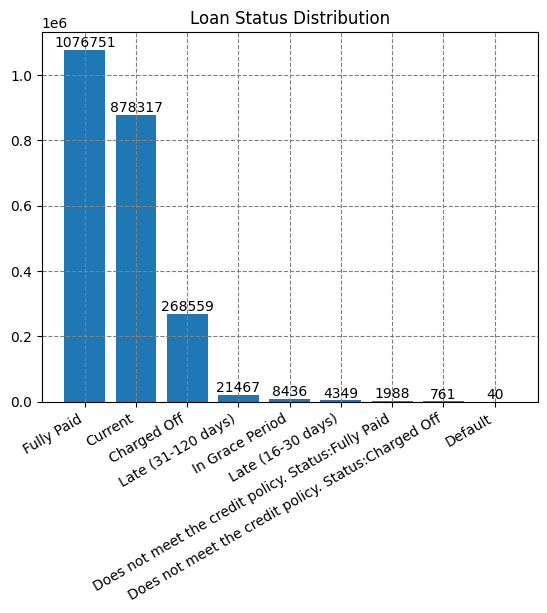

In [10]:
fig, ax = plt.subplots()
max_bar = 15
keys_list = Dataset_NotNull_Col.value_counts('loan_status').keys()
keys_list = [str(x) for x in keys_list]
keys_list = keys_list[:min(max_bar, len(keys_list))]
val_list = Dataset_NotNull_Col.value_counts('loan_status').to_list()
val_list = val_list[:min(max_bar, len(val_list))]
barplot = plt.bar(keys_list, val_list)

bars = ax.patches
labels = val_list
for bar, label in zip(bars, labels): 
    height = bar.get_height() 
    ax.text(bar.get_x() + bar.get_width() / 2, height+0.01, label, ha='center', va='bottom')  


ax.grid(color='gray', linestyle='dashed')
plt.xticks(rotation=30, ha='right')
plt.title('Loan Status Distribution')

#### FICO Rating

Introducing now FICO rating, the credit scoring model that Fair Isaac Corporation developed, a FICO credit score is a tool used by many lenders to determine if a person qualifies for a credit card, mortgage , or other loan.

FICO Score ranges:

![FICO](./27853385855_e8a877a4e7_w.jpg) 

FICO Score components:

<img src="./score-graphic.png" alt="Alt Text" width="400" height="477">

Source: www.cafecredit.com

FICO is a personal score so we can group the data in order to identify trends, looking at FICO rating distribution per loan status if notorious how people with current debts has higher scores, and people how charged off their loans have significant lower rating, that's beacuse FICO rating also considers the length of credit history giving that an individual how pays for longer periods is going to pay more interests to the lender.

(array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(1, 0, 'Charged Off'),
  Text(2, 0, 'Current'),
  Text(3, 0, 'Default'),
  Text(4, 0, 'Does not meet the credit policy. Status:Charged Off'),
  Text(5, 0, 'Does not meet the credit policy. Status:Fully Paid'),
  Text(6, 0, 'Fully Paid'),
  Text(7, 0, 'In Grace Period'),
  Text(8, 0, 'Late (16-30 days)'),
  Text(9, 0, 'Late (31-120 days)')])

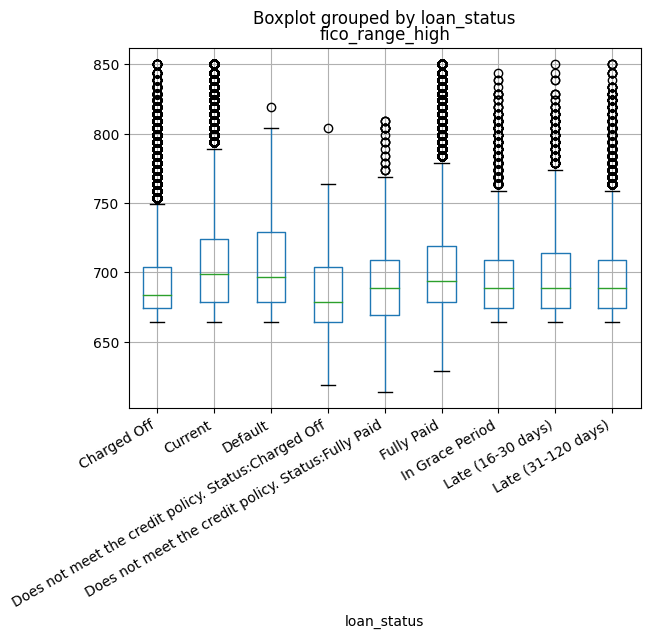

In [11]:
Dataset_NotNull_Col.boxplot(column=['fico_range_high'], by='loan_status')
plt.xticks(rotation=30, ha='right')

#### Grade

Another parameter we can explore is the grade, similar to FICO, the grade is a personal ranking for credit qualification. The histogram below shows that the majority of the population in this dataset have a high grade of A, B and C.

Text(0.5, 1.0, 'Grade Distribution')

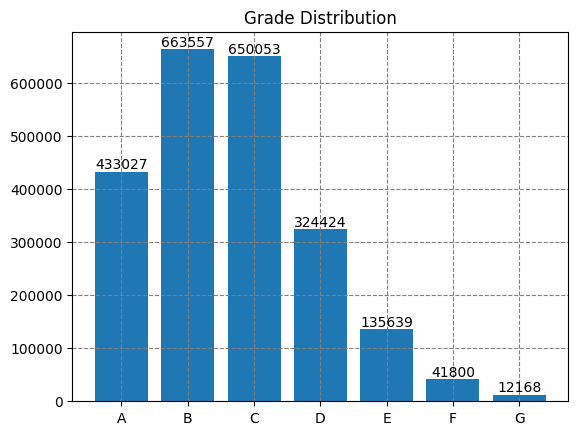

In [12]:
fig, ax = plt.subplots()
max_bar = 15
keys_list = sorted(Dataset_NotNull_Col.value_counts('grade').keys().to_list())
keys_list = [str(x) for x in keys_list]
keys_list = keys_list[:min(max_bar, len(keys_list))]

dict = {i: Dataset_NotNull_Col.value_counts('grade').to_dict()[i] for i in keys_list}
val_list = list(dict.values())
val_list = val_list[:min(max_bar, len(val_list))]
barplot = plt.bar(keys_list, val_list)

bars = ax.patches
labels = val_list
for bar, label in zip(bars, labels): 
    height = bar.get_height() 
    ax.text(bar.get_x() + bar.get_width() / 2, height+0.01, label, ha='center', va='bottom')  


ax.grid(color='gray', linestyle='dashed')
plt.title('Grade Distribution')

If we group FICO rating distributions per grade we see a positive correlation where higher grades has higher fico rating.

(array([1, 2, 3, 4, 5, 6, 7]),
 [Text(1, 0, 'A'),
  Text(2, 0, 'B'),
  Text(3, 0, 'C'),
  Text(4, 0, 'D'),
  Text(5, 0, 'E'),
  Text(6, 0, 'F'),
  Text(7, 0, 'G')])

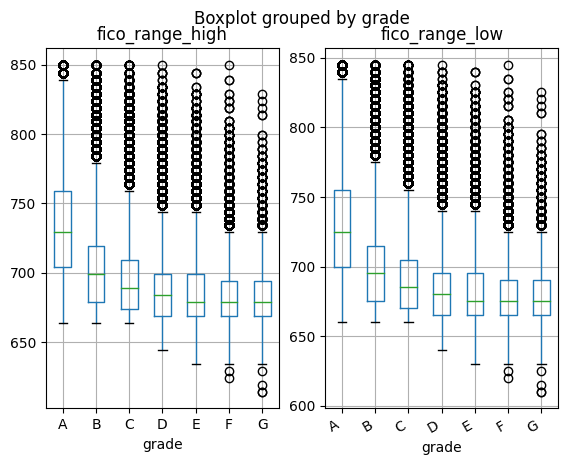

In [13]:
fig, ax = plt.subplots(1,2)
Dataset_NotNull_Col.boxplot(column=['fico_range_high'], by='grade',ax=ax[0])
Dataset_NotNull_Col.boxplot(column=['fico_range_low'], by='grade',ax=ax[1])
plt.xticks(rotation=30, ha='right')

#### DTI Ratio

Another interesting feature is the debt-to-income ratio (DTI), this parameter is a ratio calculated using the borrower’s total monthly debt payments on the total debt obligations divided by the borrower’s monthly income.

Plotting DTI distribution shows some outliers.

<Axes: ylabel='Frequency'>

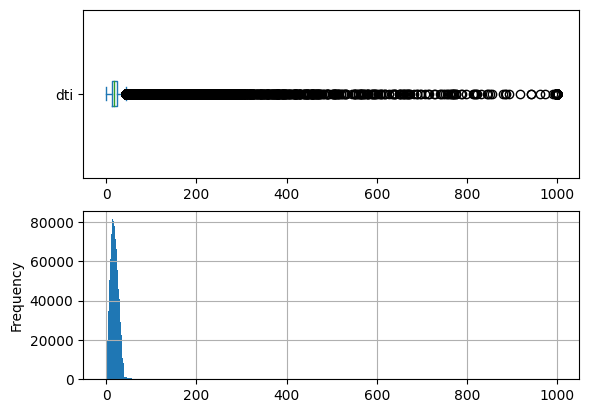

In [14]:
fig, ax = plt.subplots(2,1)
Dataset_NotNull_Col['dti'].plot(kind='box', ax=ax[0], vert=False)
Dataset_NotNull_Col['dti'].plot(kind='hist',bins=1200, ax=ax[1],  grid=True)

To treat the outliers we define the IQR range of the distribution and exclude the records out of the limits.

In [15]:
# calculate IQR for column Height
Q1 = Dataset_NotNull_Col['dti'].quantile(0.25)
print("Q1:",Q1)
Q3 = Dataset_NotNull_Col['dti'].quantile(0.75)
print("Q3:",Q3)
IQR = Q3 - Q1
print("IQR:", round(IQR,2))

# identify outliers
threshold = 1.5
outliers = Dataset_NotNull_Col[(Dataset_NotNull_Col['dti'] < Q1 - threshold * IQR) | (Dataset_NotNull_Col['dti'] > Q3 + threshold * IQR)]

df_no_dti_outliers = Dataset_NotNull_Col.drop(outliers.index)

print("Mean:", round(df_no_dti_outliers['dti'].mean(),2))
print("Number of dti outliers",len(outliers.index),"(", str(round(len(outliers.index)*100/len(Dataset_NotNull_Col.index),3))+"%", ")")

Q1: 11.89
Q3: 24.49
IQR: 12.6
Mean: 18.24
Number of dti outliers 21580 ( 0.955% )


Now we can plot again DTI ratio without outliers. This chart show us that the mean of the DTI ratio is 18.24%, meaning that in average people have a loan payment of 18% of their monthly income.

(-3.0, 45.0)

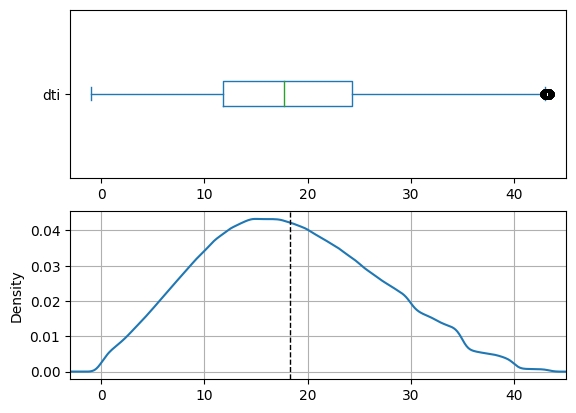

In [16]:
fig, ax = plt.subplots(2,1)
df_no_dti_outliers['dti'].plot(kind='box', ax=ax[0], vert=False)
df_no_dti_outliers['dti'].plot(kind='kde', ax=ax[1], grid=True)
plt.axvline(df_no_dti_outliers['dti'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[0].set_xlim([-3, 45])
ax[1].set_xlim([-3, 45])

An interesting piece of information in this dataset is the employment title, we can use this feature to get some insights and recomendations leater. First we find that there over 438k different employment titles and summarizing and sorting the data we can obtaing the most frequent jobs for loan borrowers.

#### Employment Title Analysis

In [17]:
print("="*33+"\n"+"Amount of job titles:",len(Dataset_NotNull_Col['emp_title'].str.lower().value_counts()))
Dataset_NotNull_Col['emp_title'].str.lower().value_counts()[0:19]

Amount of job titles: 438350


emp_title
teacher               46125
manager               42822
owner                 31740
registered nurse      21407
driver                20786
supervisor            18560
sales                 17647
rn                    16672
office manager        13163
project manager       12891
general manager       12111
truck driver          11144
director               9619
president              9032
engineer               8498
sales manager          7872
operations manager     7486
nurse                  6864
police officer         6778
Name: count, dtype: int64

Looking closely at the previous summary we can see that there 3 records with similarities: registered nurse, nurse and rn. For this analysis we are going to asssume that nurse and registerd nurse are different jobs titles and we are going to apply a lambda function to replace rn by registered nurse since rn is an acronym.

In [18]:
import re
pattern = re.compile("^\s*r\.*n\.*\s*$")
Dataset_NotNull_Col.loc[:, ('emp_title')] = Dataset_NotNull_Col['emp_title'].apply(lambda x: 'registered nurse' if re.search(pattern,str(x).lower()) else x)
Dataset_NotNull_Col['emp_title'].str.lower().value_counts()[0:5]

emp_title
teacher             46125
manager             42822
registered nurse    38791
owner               31740
driver              20786
Name: count, dtype: int64

Once resolve duplicated records we are going to create a sumamry table grouping per job title and calculating average of annual income, loan amount ahd fico rating.

In [19]:
grouped_data = Dataset_NotNull_Col[["annual_inc","fico_range_high","loan_amnt","emp_title"]].dropna()
grouped_data.loc[:, ("emp_title")] = grouped_data["emp_title"].apply(lambda x: str(x).lower())
grouped_data = grouped_data.groupby('emp_title').agg({"emp_title":'size', 'annual_inc':'mean', "loan_amnt":"mean", "fico_range_high":"mean"}).rename(columns={'emp_title':'count'})
grouped_data = grouped_data.sort_values(by=["count"], ascending=False)
grouped_data = grouped_data.reset_index()
print(grouped_data.head(20))

             emp_title  count     annual_inc     loan_amnt  fico_range_high
0              teacher  46125   65703.397607  14618.488889       703.893702
1              manager  42822   79812.923676  15615.664845       701.540003
2     registered nurse  38791   85471.525151  16778.516924       702.613415
3                owner  31740   93247.111433  16974.285602       705.405482
4               driver  20786   65282.084666  13559.746945       698.694795
5           supervisor  18560   69819.994578  14517.976832       699.414494
6                sales  17647   84977.596890  14838.006460       699.969570
7       office manager  13163   57864.353429  13755.830738       701.276457
8      project manager  12891   94656.515775  17679.633077       703.942208
9      general manager  12111   93140.718832  17282.321856       701.288828
10        truck driver  11144   68470.228430  14559.226938       698.611450
11            director   9619  139577.787569  20050.756316       706.654434
12          

With this information we are going to create an scatter plot with the 50 most frequent job titles.

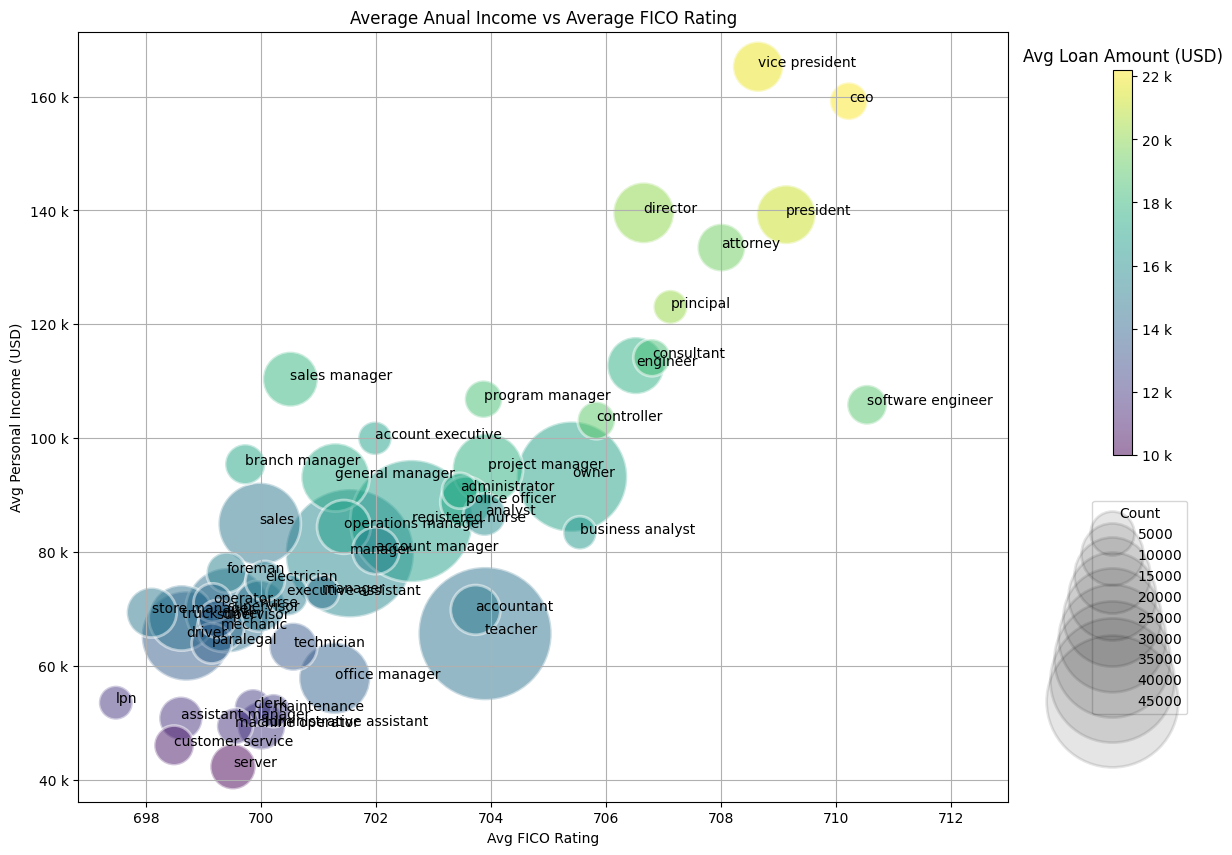

In [20]:
from matplotlib.ticker import EngFormatter

fig, ax = plt.subplots(figsize=(15, 10))

bubble_df = grouped_data.loc[:50, :]

# Scatterplot
scatterplot = ax.scatter(
    x = bubble_df['fico_range_high'], 
    y = bubble_df['annual_inc'], 
    s = bubble_df['count']/5, 
    c = bubble_df['loan_amnt'], 
    alpha = 0.5, 
    edgecolors = "white", 
    linewidth = 2
)
 
#plt.yscale('log')
formatter0 = EngFormatter(unit='')
ax.set_xlabel("Avg FICO Rating")
ax.set_ylabel("Avg Personal Income (USD)")
ax.set_title("Average Anual Income vs Average FICO Rating")
cbar = fig.colorbar(scatterplot, format=formatter0, shrink=0.5, anchor=(0.3, 0.9))
cbar.ax.set_title("Avg Loan Amount (USD)")
ax.grid(True)
plt.xlim(right=713)
ax.yaxis.set_major_formatter(formatter0)

handles, labels = scatterplot.legend_elements(prop="sizes", alpha=0.1, func = lambda x: x*5)
legend2 = ax.legend(handles, labels, title="Count", bbox_to_anchor=(0.7, 0., 0.5, 0.4))

for i, txt in enumerate(bubble_df.emp_title):
    ax.annotate(txt, (bubble_df.fico_range_high.iat[i],bubble_df.annual_inc.iat[i]), rotation=0)
plt.show()

From this chart we can extract very useful insights:
- Borrowers with higher income trend to have higher FICO rating
- Borrowers with higher loan amounts have in general higher income and higher FICO rating.
- Bigger job groups trend to be in the middle of distribution
- Software engineers have in average the highest FICO rating with lower salaries, abnormal behabior in the distribution.

#### Average Gain per Guild

Lets create now another summary table similar to the previous but now adding a column calculating the average annual gain multipling the mean of interest rate, loan amount, and the count of individuals.

In [21]:
grouped_bar_data = Dataset_NotNull_Col[["int_rate","loan_amnt","emp_title"]].dropna()
grouped_bar_data.loc[:, ("emp_title")] = grouped_bar_data["emp_title"].apply(lambda x: str(x).lower())
grouped_bar_data = grouped_bar_data.groupby('emp_title').agg({"emp_title":'size', 'int_rate':'mean', "loan_amnt":"mean"}).rename(columns={'emp_title':'count'})
grouped_bar_data['int_rate'] = grouped_bar_data['int_rate'] / 100
grouped_bar_data['Avg_gain'] = grouped_bar_data['int_rate'] * grouped_bar_data['loan_amnt'] * grouped_bar_data['count']
grouped_bar_data = grouped_bar_data.sort_values(by=["Avg_gain"], ascending=False)
grouped_bar_data = grouped_bar_data.reset_index()
print(grouped_bar_data.head(20))

             emp_title  count  int_rate     loan_amnt      Avg_gain
0              manager  42822  0.131529  15615.664845  8.795287e+07
1              teacher  46125  0.127519  14618.488889  8.598312e+07
2     registered nurse  38791  0.126402  16778.516924  8.226939e+07
3                owner  31740  0.125948  16974.285602  6.785640e+07
4               driver  20786  0.135788  13559.746945  3.827218e+07
5           supervisor  18560  0.136189  14517.976832  3.669668e+07
6                sales  17647  0.129628  14838.006460  3.394252e+07
7      project manager  12891  0.124519  17679.633077  2.837881e+07
8      general manager  12111  0.129779  17282.321856  2.716364e+07
9       office manager  13163  0.131574  13755.830738  2.382390e+07
10            director   9619  0.122483  20050.756316  2.362299e+07
11           president   9032  0.119559  21160.739593  2.285052e+07
12        truck driver  11144  0.137751  14559.226938  2.234989e+07
13            engineer   8498  0.122795  17644.6

With this information we can obtain what guilts are contribuiting the most paying interests to the lender, and create a bar chart tha thelp us visualize it.

Text(0.5, 1.0, 'Avg Gain per Job Title on a Year')

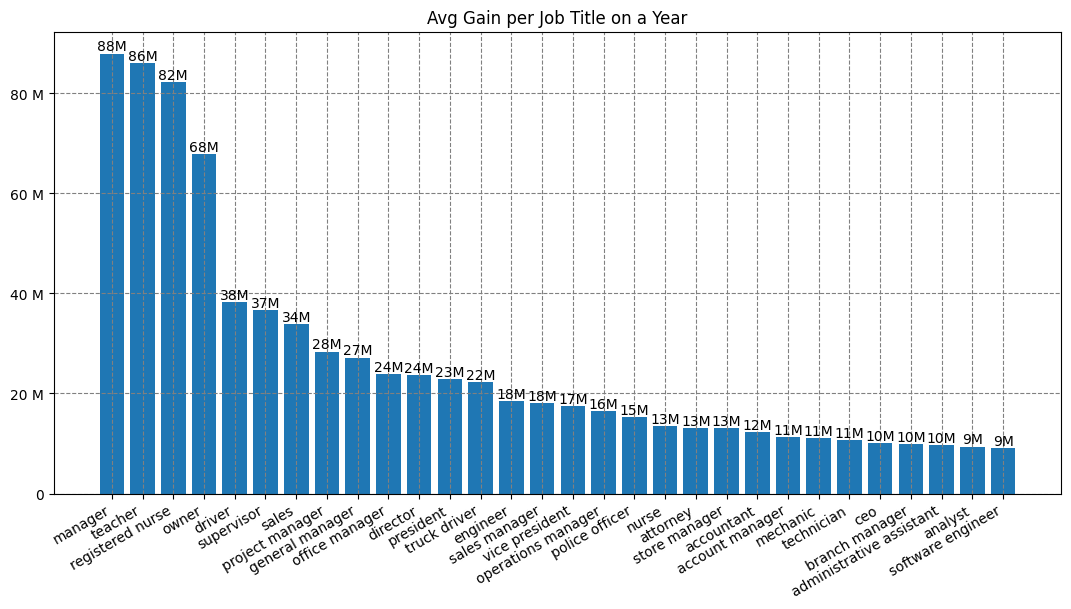

In [22]:
fig, ax = plt.subplots(figsize=(13, 6))
max_bar = 30
keys_list = grouped_bar_data['emp_title'].to_list()
keys_list = keys_list[:min(max_bar, len(keys_list))]

val_list = list(grouped_bar_data['Avg_gain'])
val_list = val_list[:min(max_bar, len(val_list))]
barplot = plt.bar(keys_list, val_list)

bars = ax.patches
labels = val_list
for bar, label in zip(bars, labels): 
    height = bar.get_height() 
    label = str(round(label/1000000))+'M'
    ax.text(bar.get_x() + bar.get_width() / 2, height+0.01, label, ha='center', va='bottom')  


formatter0 = EngFormatter(unit='')
ax.yaxis.set_major_formatter(formatter0)

ax.grid(color='gray', linestyle='dashed')
plt.xticks(rotation=30, ha='right')
plt.title('Avg Gain per Job Title on a Year')

It is obvious now that there are first 4 guilds contribute significantly more that the rest of the groups. 

If we examine the grade distributions at each job groups we can also see that Theacher, Owner and Registered Nurse have over 50% of the individuals in grades A nad B.

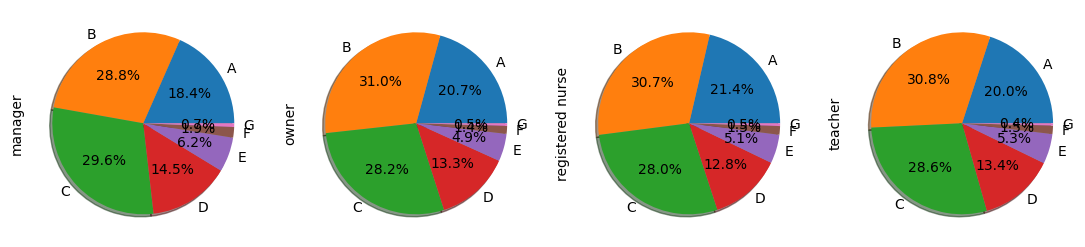

In [23]:
grouped_grade = Dataset_NotNull_Col[["grade","emp_title"]].dropna()
grouped_grade.loc[:, ("emp_title")] = grouped_grade["emp_title"].apply(lambda x: str(x).lower())

grouped_grade = grouped_grade.where((grouped_grade['emp_title']=='teacher') | \
                                    (grouped_grade['emp_title']=='manager') | \
                                    (grouped_grade['emp_title']=='registered nurse') | \
                                    (grouped_grade['emp_title']=='owner') \
                                   ).groupby(['emp_title'])['grade'].value_counts().reset_index()
grouped_grade = grouped_grade.pivot(index='grade', columns='emp_title', values='count')
pie_plt = grouped_grade.plot.pie(subplots=True,legend=False, figsize=(13.5, 5),autopct='%1.1f%%', shadow=True, startangle=0)


Text(0.5, 1.0, 'Amount of Loans per Job Title and Loan Porpuse')

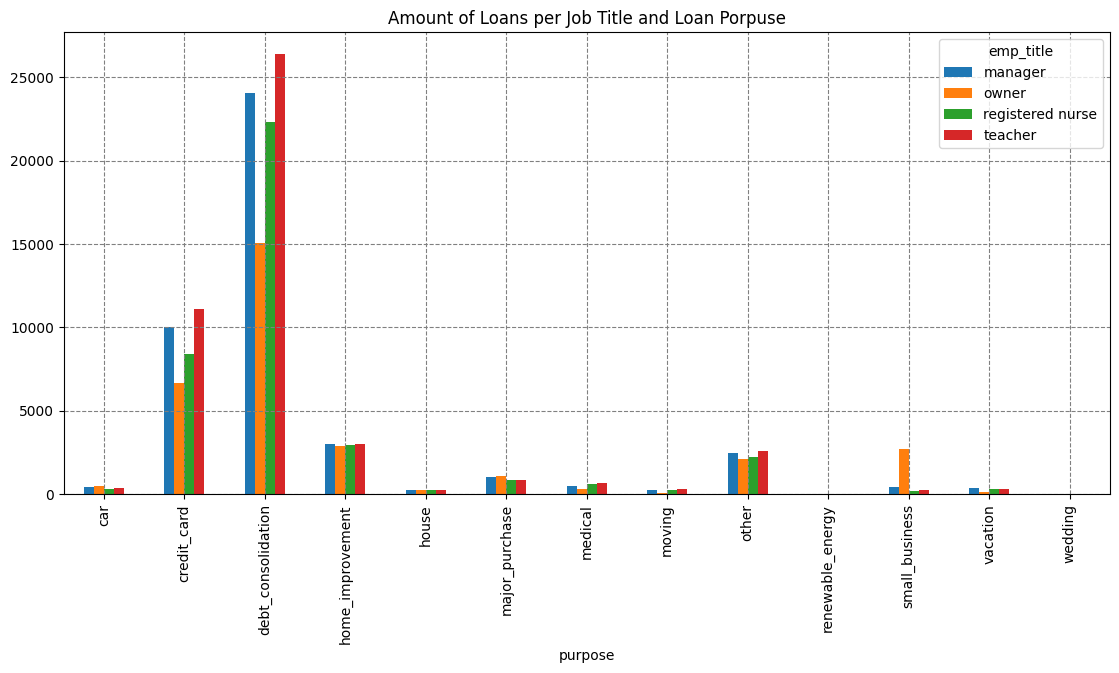

In [24]:
grouped_grade = Dataset_NotNull_Col[["purpose","emp_title"]].dropna()
grouped_grade.loc[:, ("emp_title")] = grouped_grade["emp_title"].apply(lambda x: str(x).lower())

grouped_grade = grouped_grade.where((grouped_grade['emp_title']=='teacher') | \
                                    (grouped_grade['emp_title']=='manager') | \
                                    (grouped_grade['emp_title']=='registered nurse') | \
                                    (grouped_grade['emp_title']=='owner') \
                                   ).groupby(['emp_title'])['purpose'].value_counts().reset_index()
grouped_grade = grouped_grade.pivot(index='purpose', columns='emp_title', values='count')

bar_plt = grouped_grade.plot.bar( figsize=(13.5, 6))
bar_plt.grid(color='gray', linestyle='dashed')
bar_plt.set_title('Amount of Loans per Job Title and Loan Porpuse')

Combining what we have learn so far we can recomment to implement marketing strategies targeting those populations with the objective of consolidate a solid base in the bank. For example offer additional benefits to teachers and managers to acquire debt consolidation or credit card loans, or longer payment periods to owners, or better loan conditions for registered nurse, etc.

#### Loan Porpuse Analysis

Lets now explore the distribution of loan porpuse in the dataset, but first lets take a look of the issue date format.

In [25]:
Dataset_NotNull_Col["issue_d"].head()

0    Dec-2015
1    Dec-2015
2    Dec-2015
3    Dec-2015
4    Dec-2015
Name: issue_d, dtype: object

Looks like we need to split issue date to separate months from years to further analyze it.

Looking now at the amount of recorded loans per year is visible the unbalance having a dispropotional number of loans on latest years. For this reason we will analize evolution of loan porpuse in time as a percentage of the total in a particular year.

<Axes: xlabel='1'>

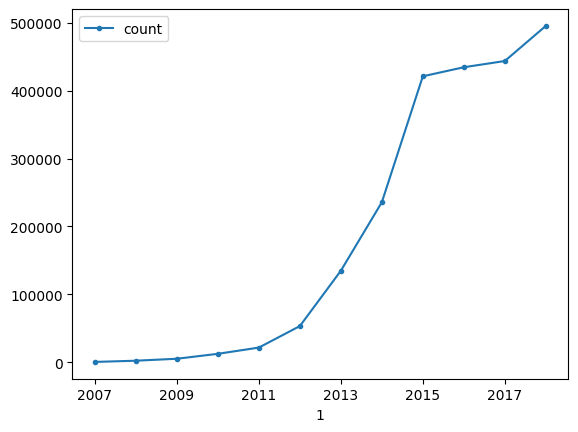

In [26]:
Dataset_NotNull_Col["issue_d"].str.split("-",expand=True).groupby(1).agg({1:"count"}).rename(columns={1:'count'}).reset_index().plot.line(x=1,y='count', marker='.')

To have an overall sight of the loan porpuse feature we can create a bar chart:

<Axes: xlabel='purpose'>

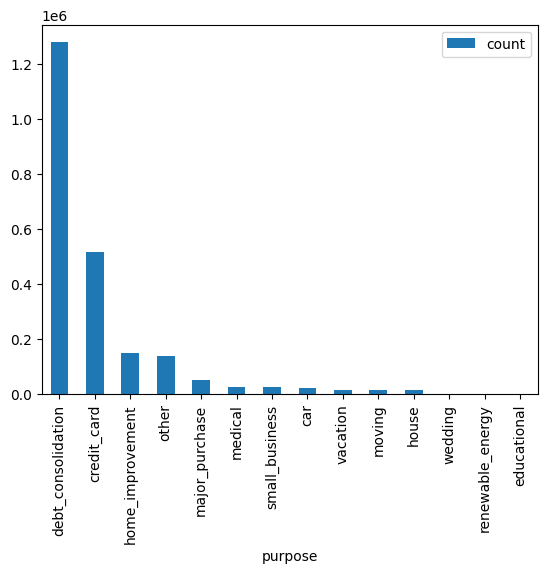

In [27]:
grouped_data_purpose = Dataset_NotNull_Col.groupby("purpose").agg({"purpose":"count"}).rename(columns={"purpose":'count'}).sort_values(by=["count"], ascending=False)
grouped_data_purpose.plot.bar()

Now to build the plot we proceed to create the table gruoping the amount of records per year for every porpuse category

In [28]:
grouped_data_purpose_date = Dataset_NotNull_Col[["issue_d","purpose"]].dropna()
grouped_data_purpose_date[['month','year']] = grouped_data_purpose_date["issue_d"].str.split("-",expand=True)
grouped_data_purpose_date = grouped_data_purpose_date.groupby(['year','month','purpose']).agg({'month':"count"}).rename(columns={'month':'count'})
grouped_data_purpose_date

count
year month purpose                  
2007 Aug   car                     3
           credit_card            21
           debt_consolidation     17
           educational             5
           home_improvement        6
...                              ...
2018 Sep   moving                230
           other                1927
           renewable_energy       17
           small_business        290
           vacation              213

[1740 rows x 1 columns]

To get a sorted table we will apply a lambda function to add a column with the month in its numeric form.

In [29]:
grouped_data_purpose_date = grouped_data_purpose_date.reset_index()
grouped_data_purpose_date['month_num'] = grouped_data_purpose_date['month'].apply(lambda x: {'Jan':1, 'Feb':2, 'Mar':3, 
                                                                                             'Apr':4, 'May':5, 'Jun':6, 
                                                                                             'Jul':7, 'Aug':8, 'Sep':9, 
                                                                                             'Oct':10, 'Nov':11, 'Dec':12}[x])
grouped_data_purpose_date

,year,month,purpose,count,month_num
0,2007,Aug,car,3,8
1,2007,Aug,credit_card,21,8
2,2007,Aug,debt_consolidation,17,8
3,2007,Aug,educational,5,8
4,2007,Aug,home_improvement,6,8
...,...,...,...,...,...
1735,2018,Sep,moving,230,9
1736,2018,Sep,other,1927,9
1737,2018,Sep,renewable_energy,17,9
1738,2018,Sep,small_business,290,9


Then we pivot the table to obtain a column per category and repalce NaN values for 0

In [30]:
grouped_data_purpose_date['count_perc'] = grouped_data_purpose_date['count'] / grouped_data_purpose_date.groupby(['year','month_num'])['count'].transform('sum')
grouped_data_purpose_date = grouped_data_purpose_date.pivot_table(values='count_perc', index=['year','month_num'],columns=['purpose']).fillna(0)
grouped_data_purpose_date

purpose              car  credit_card  debt_consolidation  educational  \
year month_num                                                           
2007 6          0.000000     0.000000            0.125000     0.000000   
     7          0.031746     0.269841            0.253968     0.095238   
     8          0.040541     0.283784            0.229730     0.067568   
     9          0.037736     0.094340            0.452830     0.075472   
     10         0.019048     0.133333            0.352381     0.076190   
...                  ...          ...                 ...          ...   
2018 8          0.008290     0.273226            0.541223     0.000000   
     9          0.008200     0.276482            0.554938     0.000000   
     10         0.007839     0.275629            0.548753     0.000000   
     11         0.008148     0.276225            0.548853     0.000000   
     12         0.008272     0.264215            0.552051     0.000000   

purpose         home_improvement     house  major_purchase   medical  \
year month_num                                                         
2007 6                  0.000000  0.000000        0.000000  0.000000   
     7                  0.095238  0.000000        0.000000  0.000000   
     8                  0.081081  0.027027        0.000000  0.000000   
     9                  0.094340  0.000000        0.000000  0.037736   
     10                 0.038095  0.009524        0.000000  0.009524   
...                          ...       ...             ...       ...   
2018 8                  0.064368  0.006033        0.018555  0.010829   
     9                  0.059140  0.005227        0.017476  0.009942   
     10                 0.061160  0.006112        0.017234  0.011165   
     11                 0.057156  0.006028        0.018250  0.012437   
     12                 0.056835  0.007151        0.018413  0.011462   

purpose           moving     other  renewable_energy  small_business  \
year month_num                                                         
2007 6          0.000000  0.875000          0.000000        0.000000   
     7          0.031746  0.126984          0.000000        0.063492   
     8          0.040541  0.162162          0.000000        0.040541   
     9          0.000000  0.150943          0.000000        0.056604   
     10         0.009524  0.228571          0.000000        0.095238   
...                  ...       ...               ...             ...   
2018 8          0.006445  0.056794          0.000586        0.007379   
     9          0.005894  0.049377          0.000436        0.007431   
     10         0.005205  0.052737          0.000626        0.007904   
     11         0.004693  0.053654          0.000548        0.007981   
     12         0.005432  0.059800          0.000473        0.008721   

purpose         vacation   wedding  
year month_num                      
2007 6          0.000000  0.000000  
     7          0.031746  0.000000  
     8          0.013514  0.013514  
     9          0.000000  0.000000  
     10         0.009524  0.019048  
...                  ...       ...  
2018 8          0.006272  0.000000  
     9          0.005458  0.000000  
     10         0.005637  0.000000  
     11         0.006028  0.000000  
     12         0.007176  0.000000  

[139 rows x 14 columns]

Finally we can plot the data finding an interesting perspective of the evolution of loan needs across time.

Text(0, 0.5, 'Percentage')

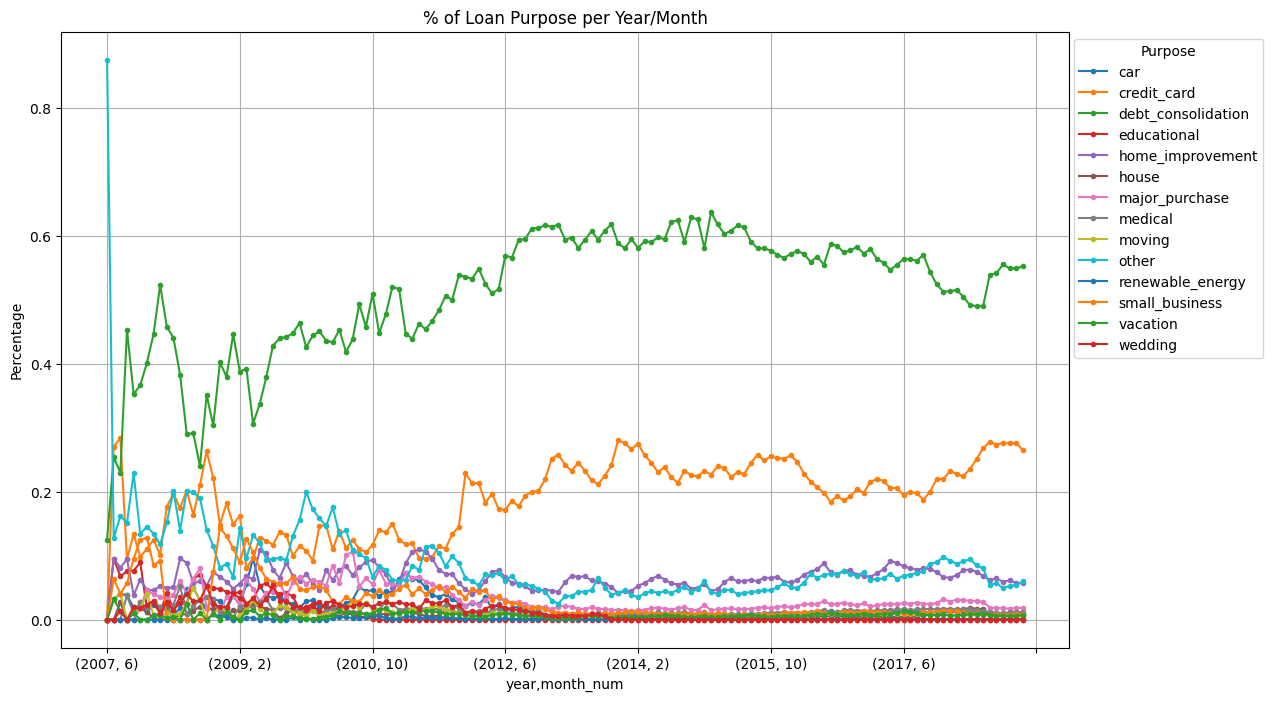

In [31]:
purpose_plot = grouped_data_purpose_date.plot.line(marker='.',figsize=(13,8),grid=True)
purpose_plot.legend(title="Purpose", bbox_to_anchor=(0.7, 0., 0.5, 1))
purpose_plot.set_title("% of Loan Purpose per Year/Month")
purpose_plot.set_ylabel("Percentage")

## Stage 2: Data Handling

Now we have explored the dataset it's time to clean it up, treat missing data and prepare it for the model training stage.

Taking a closer look at the dataset we can notice that there are column with the "joint" sufix, this means those records belong to a different category that combine features of multiple borrowers that had acquire a single loan, and therefore could be incomvinient for our model since feactures does not always apply in both categories at the same time, so becuase these joint loans are less than 6% of the dataset we are going to drop those columns and their record to focus only on personal loan analysis.

In [32]:
print('% of not null records:')
Dataset_NotNull_Col.filter(regex='joint').notnull().sum()/Dataset_NotNull_Col.shape[0]*100

% of not null records:


revol_bal_joint              4.778168
verification_status_joint    5.119213
dti_joint                    5.339322
annual_inc_joint             5.339499
dtype: float64

Lets take the joint column with the greater amount of records and remove it from the dataset

In [33]:
Dataset_NotNull_Col_temp = Dataset_NotNull_Col.drop(Dataset_NotNull_Col[Dataset_NotNull_Col['annual_inc_joint'].notnull()].index)
print(Dataset_NotNull_Col_temp.shape[0])

2139989


Doublechecking all joint records were removed:

In [34]:
print('% of not null records:')
Dataset_NotNull_Col_temp.filter(regex='joint').notnull().sum()

% of not null records:


revol_bal_joint              0
verification_status_joint    0
dti_joint                    0
annual_inc_joint             0
dtype: int64

Then lets remove those columns from the dataset and check again for null values

In [35]:
Dataset_NotNull_Col = Dataset_NotNull_Col_temp.drop(columns=['revol_bal_joint', 'verification_status_joint', 'dti_joint', 'annual_inc_joint'])

In our prediction exercise we plan to predict the grade of an individual based on the other features, so lets get rid of grade column null records too.

In [36]:
print('% of not null records:')
Dataset_NotNull_Col['grade'].notnull().sum()/Dataset_NotNull_Col.shape[0]*100

% of not null records:


99.99855139442305

In [37]:
Dataset_NotNull_Col = Dataset_NotNull_Col.drop(Dataset_NotNull_Col[Dataset_NotNull_Col['grade'].isnull()].index)
print(Dataset_NotNull_Col.shape[0])

2139958


In [38]:
total_rows = Dataset_NotNull_Col_temp.shape[0]
null_info_dict= {}
for col in Dataset_NotNull_Col_temp.columns:
    null_count = pd.isnull(Dataset_NotNull_Col_temp[col]).sum()
    percent_null_values = 100*null_count/total_rows
    null_info_dict[col] = null_count
#null_info_dict = dict(sorted(null_info_dict.items(), key=lambda item: item[1],  reverse=True))


print("{:<8} {:<45} {:<12} {:<12} {:<10} ".format('Index','Column_name', 'Dtype', 'Null Values', 'Percent'))
for i, k in enumerate(null_info_dict.keys()):
    print("{:<8} {:<45} {:<12} {:<12} {:<10} ".format(i+1, k, str(Dataset_NotNull_Col_temp.dtypes[k]), null_info_dict[k], str(round(100*null_info_dict[k]/total_rows, 3))+'%'))

Index    Column_name                                   Dtype        Null Values  Percent    
1        orig_projected_additional_accrued_interest    float64      2131807      99.618%    
2        hardship_type                                 object       2129647      99.517%    
3        hardship_reason                               object       2129647      99.517%    
4        hardship_status                               object       2129647      99.517%    
5        deferral_term                                 float64      2129647      99.517%    
6        hardship_amount                               float64      2129647      99.517%    
7        hardship_start_date                           object       2129647      99.517%    
8        hardship_end_date                             object       2129647      99.517%    
9        payment_plan_start_date                       object       2129647      99.517%    
10       hardship_length                               float64      21

Looks like removing those records also removed all valid records of columns "sec_app_*" which make sense since those columns are reserved for the Secundary Applicant in the loan, so lets also remove them from our dataset:

In [39]:
NotNull_list = [x for x in null_info_dict.keys() if null_info_dict[x] != total_rows]
print("="*33+'\n'+"Number of valid features:", len(NotNull_list))

Number of valid features: 134


In [40]:
Dataset_NotNull_Col = Dataset_NotNull_Col[NotNull_list]
print("Number of numeric columns:", len(Dataset_NotNull_Col.select_dtypes(include='number').columns))
print("Number of non numeric columns:", len(Dataset_NotNull_Col.select_dtypes(include='object').columns))

Number of numeric columns: 98
Number of non numeric columns: 36


Now is time to use an imputer to replace missing values in our dataset, the first group of features we will treat have in common that are numeric quantities that make sense for a small percentage of the population, hardship amount or settlement term, are a clear example. Even when the great majority of the records are missing for this features we shouln't just remove them, either make sense to impute the mean value since majority of loan owners are not being affected for those features, therefore, we'll impute constant 0 instead of missing values.

In [41]:
from sklearn.impute import SimpleImputer

Numeric_90null_list = ["orig_projected_additional_accrued_interest",
                        "deferral_term",
                        "hardship_amount",
                        "hardship_dpd",
                        "hardship_length",
                        "hardship_payoff_balance_amount",
                        "hardship_last_payment_amount",
                        "settlement_amount",
                        "settlement_percentage",
                        "settlement_term"]

imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)
imputer.fit(Dataset_NotNull_Col[Numeric_90null_list])
Dataset_NotNull_Col[Numeric_90null_list] = imputer.transform(Dataset_NotNull_Col[Numeric_90null_list])

Next group of columns are categorical features, to those we are using the imputer to replace missing values for the string: "missing". 

In [42]:
Categorical_null_list = ["hardship_type",
                        "hardship_reason",
                        "hardship_status",
                        "hardship_start_date",
                        "hardship_end_date",
                        "payment_plan_start_date",
                        "hardship_loan_status",
                        "debt_settlement_flag_date",
                        "settlement_status",
                        "settlement_date",
                        "desc",
                        "next_pymnt_d",
                        "emp_title",
                        "emp_length",
                        "title",
                        "last_credit_pull_d",
                        "earliest_cr_line",
                        "last_pymnt_d",
                        "zip_code"]

imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='missing')
imputer.fit(Dataset_NotNull_Col[Categorical_null_list])
Dataset_NotNull_Col[Categorical_null_list] = imputer.transform(Dataset_NotNull_Col[Categorical_null_list])

Then, the bigest group of features are numerical, in most cases have a smaller number of missing records, and seem to be generic. Beacuse of this make more sense to replace missing information for the mean of the values in the column.

In [43]:
Numeric_few_null_list = ["mths_since_last_record",	      "mths_since_recent_bc_dlq",	"mths_since_last_major_derog",
                        "mths_since_recent_revol_delinq", "mths_since_last_delinq",	    "il_util",
                        "mths_since_rcnt_il",	          "all_util",	                "open_acc_6m",
                        "total_cu_tl",	                  "inq_last_12m",	            "open_act_il",
                        "open_il_12m",	                  "open_il_24m",	            "total_bal_il",
                        "open_rv_12m",	                  "open_rv_24m",	            "max_bal_bc",
                        "inq_fi",	                      "mths_since_recent_inq",	    "num_tl_120dpd_2m",
                        "mo_sin_old_il_acct",	          "bc_util",	                "percent_bc_gt_75",
                        "bc_open_to_buy",	              "mths_since_recent_bc",	    "pct_tl_nvr_dlq",
                        "avg_cur_bal",	                  "mo_sin_old_rev_tl_op",	    "mo_sin_rcnt_rev_tl_op",
                        "num_rev_accts",                  "tot_coll_amt",	            "tot_cur_bal",
                        "total_rev_hi_lim",	              "mo_sin_rcnt_tl",	            "num_accts_ever_120_pd",
                        "num_actv_bc_tl",	              "num_actv_rev_tl",	        "num_bc_tl",
                        "num_il_tl",	                  "num_op_rev_tl",	            "num_rev_tl_bal_gt_0",
                        "num_tl_30dpd",	                  "num_tl_90g_dpd_24m",	        "num_tl_op_past_12m",
                        "tot_hi_cred_lim",	              "total_il_high_credit_limit",	"num_bc_sats",
                        "num_sats",	                      "acc_open_past_24mths",	    "mort_acc",
                        "total_bal_ex_mort",	          "total_bc_limit",	            "revol_util",
                        "pub_rec_bankruptcies",	          "collections_12_mths_ex_med",	"chargeoff_within_12_mths",
                        "tax_liens",	                  "inq_last_6mths",	            "delinq_2yrs",
                        "open_acc",	                      "pub_rec",	                "total_acc",
                        "acc_now_delinq",                 "delinq_amnt",                "annual_inc"]


imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(Dataset_NotNull_Col[Numeric_few_null_list])
Dataset_NotNull_Col[Numeric_few_null_list] = imputer.transform(Dataset_NotNull_Col[Numeric_few_null_list])

Finally we are removing "id" feature since does not have statistical meaning training a model.

In [44]:
Dataset_NotNull_Col = Dataset_NotNull_Col.drop('id', axis=1)

Giving a quick look of all remaining featues to check no NA vales were left behind.

In [45]:
null_list = Dataset_NotNull_Col.isnull().sum().to_list()

print("".join(str(null_list)))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [46]:
clean_dataset = Dataset_NotNull_Col

Now let's separete our target from the features

In [47]:
X = clean_dataset.drop('grade', axis=1)
print("Features:",X.shape)
y = clean_dataset['grade']
print("Targets:",y.shape)

Features: (2139958, 132)
Targets: (2139958,)


In [48]:
numeric_columns = X.select_dtypes(include='number').columns
categorical_columns = X.select_dtypes(include='object').columns

In [49]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

print(clean_dataset['grade'].to_list()[0:20])
print(y[0:20])

['C', 'C', 'C', 'F', 'C', 'B', 'B', 'A', 'B', 'C', 'C', 'C', 'E', 'A', 'A', 'A', 'C', 'B', 'E', 'C']
[2 2 2 5 2 1 1 0 1 2 2 2 4 0 0 0 2 1 4 2]


In [50]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), categorical_columns)], remainder='passthrough')
X = ct.fit_transform(X)

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

## Stage 3: Model Training

## Stage 4: Evaluation